# Importing Libraries


In [1]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
import random


In [2]:
base_path = Path(r"C:\Users\kisho\Downloads\Aeiral object detection project\Data\classification_dataset")   # change if needed

splits = ["train", "valid", "test"]
classes = ["bird", "drone"]


In [3]:
dataset_counts = {}

for split in splits:
    dataset_counts[split] = {}
    for cls in classes:
        folder = base_path / split / cls
        count = len(list(folder.glob("*")))
        dataset_counts[split][cls] = count

dataset_counts


{'train': {'bird': 1414, 'drone': 1248},
 'valid': {'bird': 217, 'drone': 225},
 'test': {'bird': 121, 'drone': 94}}

In [4]:
import pandas as pd

df_counts = pd.DataFrame(dataset_counts).T
df_counts


,bird,drone
train,1414,1248
valid,217,225
test,121,94


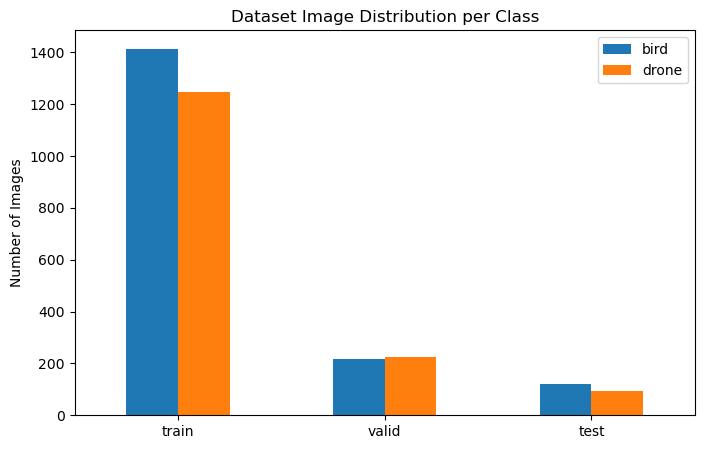

In [5]:
df_counts.plot(kind='bar', figsize=(8,5))
plt.title("Dataset Image Distribution per Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=0)
plt.show()


In [6]:
corrupted_images = []

for split in splits:
    for cls in classes:
        folder = base_path / split / cls
        for img_path in folder.glob("*"):
            try:
                img = Image.open(img_path)
                img.verify()
            except:
                corrupted_images.append(str(img_path))

corrupted_images


[]

In [7]:
for img in corrupted_images:
    os.remove(img)


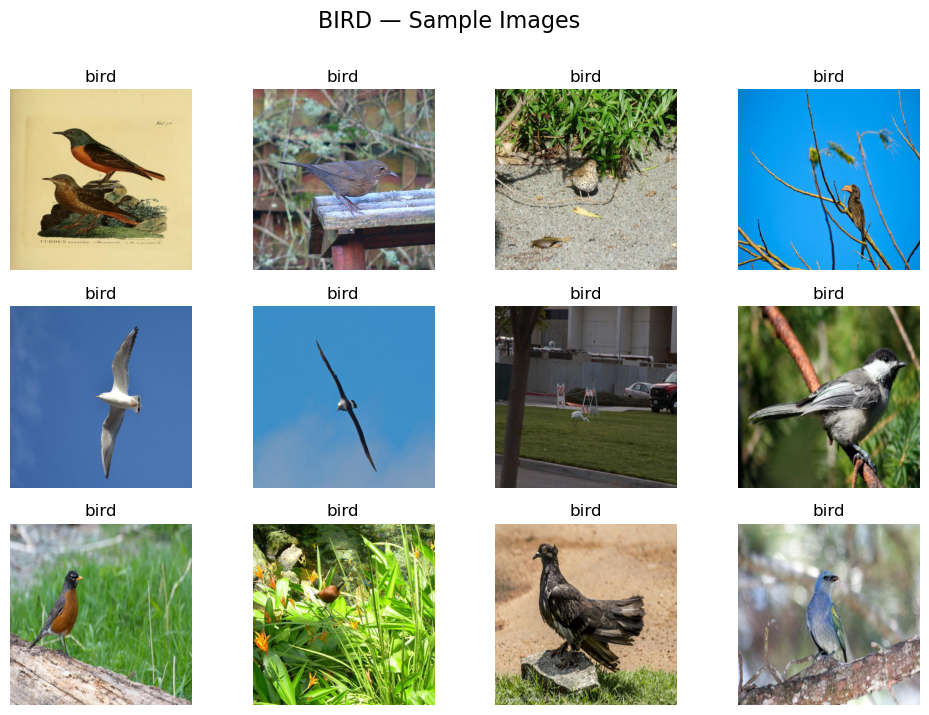

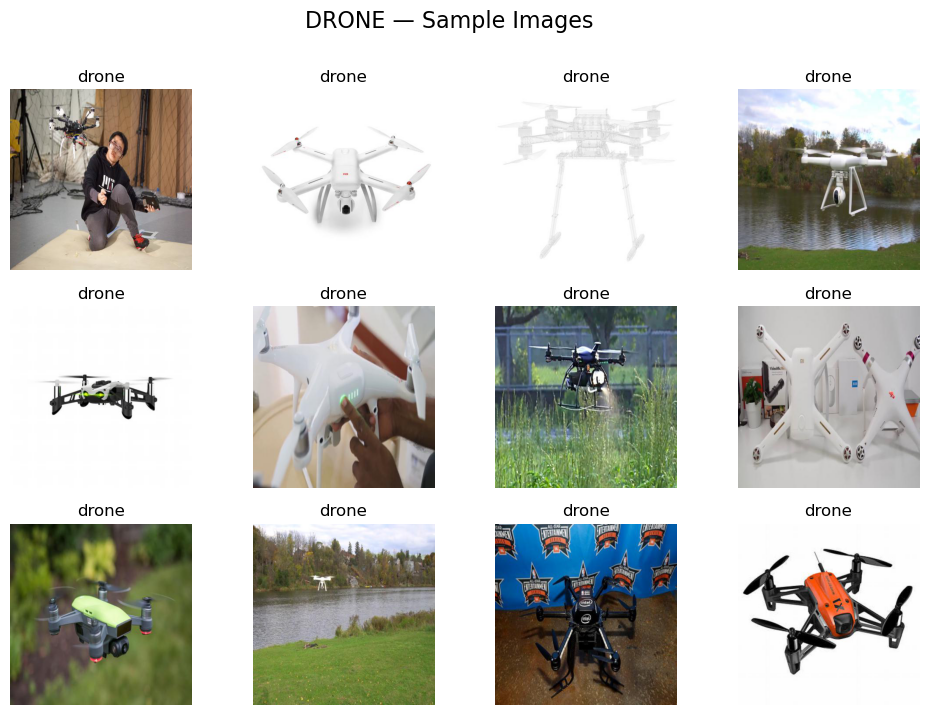

In [8]:
def show_samples(cls_name, n=12):
    folder = base_path / "train" / cls_name
    images = list(folder.glob("*"))
    samples = random.sample(images, n)

    plt.figure(figsize=(12,8))
    for i, img_path in enumerate(samples):
        plt.subplot(3,4,i+1)
        img = Image.open(img_path)
        plt.imshow(img)
        plt.axis("off")
        plt.title(cls_name)
    plt.suptitle(f"{cls_name.upper()} — Sample Images", fontsize=16)
    plt.show()

show_samples("bird")
show_samples("drone")


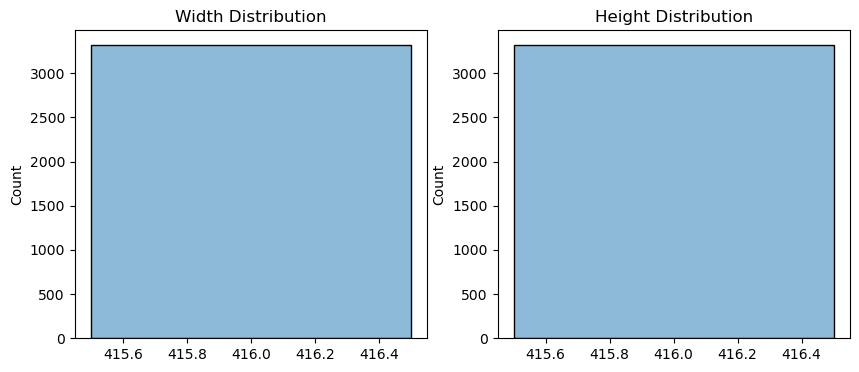

In [9]:
widths, heights = [], []

for split in splits:
    for cls in classes:
        folder = base_path / split / cls
        for img_path in folder.glob("*"):
            img = Image.open(img_path)
            w, h = img.size
            widths.append(w)
            heights.append(h)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(widths, kde=True)
plt.title("Width Distribution")

plt.subplot(1,2,2)
sns.histplot(heights, kde=True)
plt.title("Height Distribution")
plt.show()


In [10]:
summary_text = f"""
DATASET SUMMARY
--------------------------
Total TRAIN images:
  Bird:  {dataset_counts['train']['bird']}
  Drone: {dataset_counts['train']['drone']}

Total VALIDATION images:
  Bird:  {dataset_counts['valid']['bird']}
  Drone: {dataset_counts['valid']['drone']}

Total TEST images:
  Bird:  {dataset_counts['test']['bird']}
  Drone: {dataset_counts['test']['drone']}

Corrupted Images Found: {len(corrupted_images)}

Notes:
- Inspect class imbalance visually.
- If drone or bird dataset is too small, apply stronger augmentation.
"""

with open("reports_dataset_summary.txt", "w") as f:
    f.write(summary_text)

summary_text


'\nDATASET SUMMARY\n--------------------------\nTotal TRAIN images:\n  Bird:  1414\n  Drone: 1248\n\nTotal VALIDATION images:\n  Bird:  217\n  Drone: 225\n\nTotal TEST images:\n  Bird:  121\n  Drone: 94\n\nCorrupted Images Found: 0\n\nNotes:\n- Inspect class imbalance visually.\n- If drone or bird dataset is too small, apply stronger augmentation.\n'